<font size="4">Projet: Wonder Trade Analysis<br><br>
<font size="3">**Problématique:** LA_PROBLEMATIQUE<br>
<font size="3">**Membre attitré:** Théophile R.

<font color="lightblue">**Partie 01:** <font color="white">Importation(s)<br>
<font color="lightblue">**Objectif:** <font color="white">Installation des dépendances requises *(numpy et pandas)*

In [1]:
 import sys

!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib

  Using cached numpy-1.24.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
  Using cached pandas-1.5.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
  Using cached matplotlib-3.7.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.2 MB)
  Using cached contourpy-1.0.7-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (300 kB)
  Using cached Pillow-9.4.0-cp38-cp38-manylinux_2_28_x86_64.whl (3.4 MB)
  Using cached kiwisolver-1.4.4-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)


# Calcul des Winrates les plus élevés
Dans un premier temps, il est intéressant d'étudier quels sont les personnages qui s'avèrent sortir individuellement du lot parmis tous les champions. Nous allons donc dans le programme suivant analyser les 5 champions au winrate le plus élevé dans l'échantillon sur lequel nous travaillons.

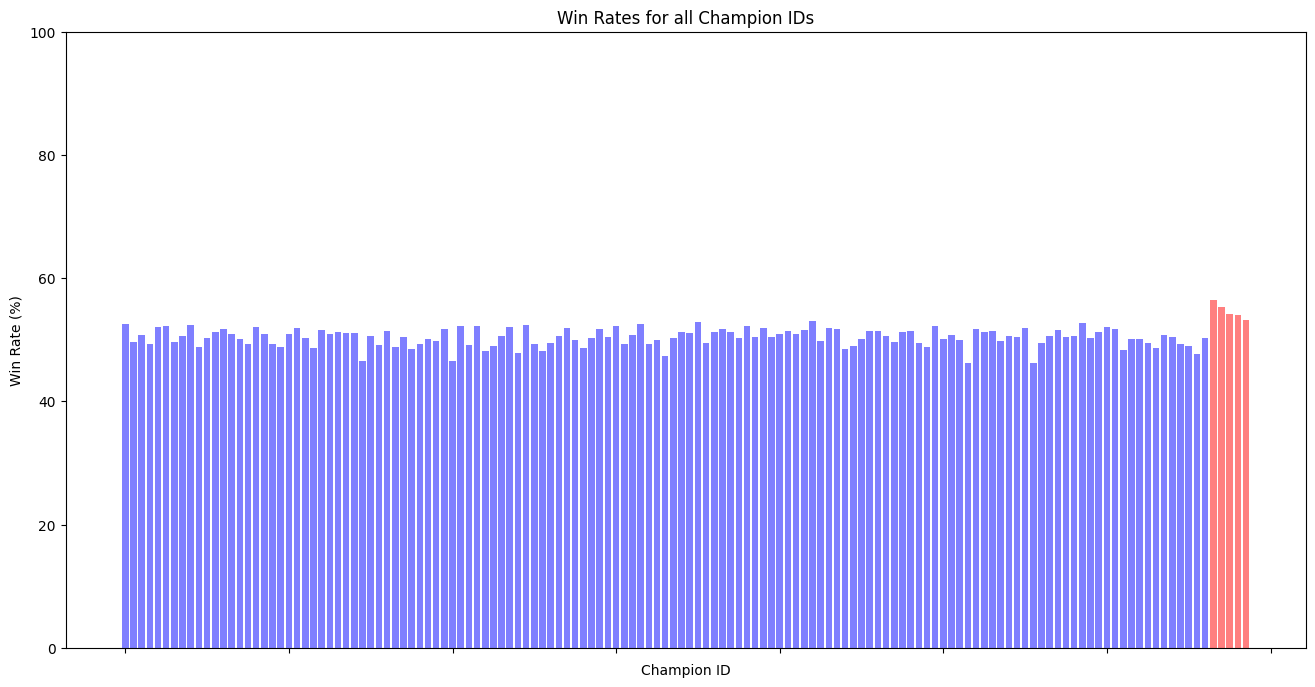

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# crée un dataframe à partir du csv
df = pd.read_csv('lol_ranked_games.csv')

# fonction de calcul du winrate d'un champion avec son champion id
def calculate_winrate(champ_id):
    champ_wins = df[(df['winner'] == 1) & ((df['t1_champ1id'] == champ_id) | (df['t1_champ2id'] == champ_id) | (df['t1_champ3id'] == champ_id) | (df['t1_champ4id'] == champ_id) | (df['t1_champ5id'] == champ_id))].shape[0]
    champ_losses = df[(df['winner'] == 2) & ((df['t2_champ1id'] == champ_id) | (df['t2_champ2id'] == champ_id) | (df['t2_champ3id'] == champ_id) | (df['t2_champ4id'] == champ_id) | (df['t2_champ5id'] == champ_id))].shape[0]
    champ_total_games = champ_wins + champ_losses
    if champ_total_games > 0:
        winrate = champ_wins / champ_total_games * 100
    else:
        winrate = 0
    return winrate

# set indexant tous les champs id présents dans le dataframe
all_champ_ids = set(df[['t1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id', 't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id']].values.flatten())

# dictionnaire contenant les champs id et leur winrate
winrates = {}
for champ_id in all_champ_ids:
    winrates[champ_id] = calculate_winrate(champ_id)

# sort le dictionnaire et donne la liste des wr
sorted_winrates = [winrates[champ_id] for champ_id in sorted(winrates.keys())]

# top 5 des wr
top_5_champs = sorted(winrates, key=winrates.get, reverse=True)[:5]

# list de tous les champs id et leur wr, en excluant le top 5
champ_data = [(champ_id, winrates[champ_id]) for champ_id in sorted(winrates.keys()) if champ_id not in top_5_champs]

# création du graph en isolant les 5 champions du top 5
fig, ax = plt.subplots(figsize=(16,8))
for i, (champ_id, winrate) in enumerate(champ_data):
    ax.bar(i, winrate, color='blue', alpha=0.5)
for i, champ_id in enumerate(top_5_champs):
    ax.bar(i + len(champ_data), winrates[champ_id], color='red', alpha=0.5)

ax.set_xticklabels([])

plt.title('Win Rates for all Champion IDs')
plt.xlabel('Champion ID')
plt.ylabel('Win Rate (%)')
plt.ylim(0, 100)

plt.show()


# Correlation
Maintenant que nous avons vu quels étaient les champions qui ont le pourcentage de wr le plus élevé, nous allons maintenant étudier les limites de ces pourcentages. Ces personnages sont ils fort dans toutes les situations ? Sont ils forts quand joués ensembles ? peut-on essayer de créer un équipe "parfaite" ?

Dans un premier temps, nous avons pu observer que Kindred peut être considérer comme le personnage le plus puissant de cet échantillon. Penchons nous donc sur le ou les personnages avec lesquels elle se débrouille le mieux. Nous allons nous servir de la même méthode.

In [ ]:
import pandas as pd

# import du dataset dans un dataframe
df = pd.read_csv('lol_ranked_games.csv')

# création d'un colonne ou kindred est dans la même équipe
df['kindred_in_team'] = (df['t1_champ1id'] == 203) | (df['t1_champ2id'] == 203) | (df['t1_champ3id'] == 203) | (df['t1_champ4id'] == 203) | (df['t1_champ5id'] == 203)

# création d'une ligne où kindred est dans la même équipe et que cette équipe est gagnante
df_203_win = df[(df['kindred_in_team'] == True) & (df['winner'] == 1)]

# calcule du winrate de chaque champ
champ_wins = {}
champ_total = {}
for col in ['t1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id']:
    champ_wins[col] = df_203_win[col].value_counts()
    champ_total[col] = df[col].value_counts()

# calcul des wr de chaque champ avec kindred exclu
winrates = {}
for col in champ_wins.keys():
    for champ, wins in champ_wins[col].iteritems():
        if champ == 203:
            continue
        total = champ_total[col].get(champ, 0)
        winrate = wins / total if total > 0 else 0
        winrates[champ] = winrate

# création du top 5  
top_5_champs = sorted(winrates.items(), key=lambda x: x[1], reverse=True)[:5]

# résultat
print("Top 5 des champions avec lesquels Kindred obtient le meilleur winrate :")
for champ, winrate in top_5_champs:
    print(f"Champion {int(champ)}: {winrate*100:.2f}%")


Top 5 des champions avec lesquels Kindred obtient le meilleur winrate :
Champion 136: 2.60%
Champion 223: 2.56%
Champion 13: 2.04%
Champion 101: 1.99%
Champion 112: 1.95%


/tmp/ipykernel_1059/3903326962.py:22: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for champ, wins in champ_wins[col].iteritems():
